In [208]:
import numpy as np
import torch
import torch.nn as nn

import cv2
from PIL import Image

In [209]:
avgpool = nn.AvgPool2d(kernel_size=3, stride=1, padding=(1,1), count_include_pad=True)
maxpool = nn.MaxPool2d(kernel_size=3, stride=1, padding=(1,1))

In [210]:
fd = '/home/jupyter/ai_font/data/exp0604/test/pngs'

In [211]:
a = Image.open(f"{fd}/트와이스 나연__카.png").convert("L")

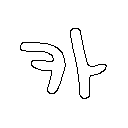

In [214]:
a0 = cv2.GaussianBlur(np.array(a),(3,3),0)
a1 = cv2.Canny(a0,50,150)
Image.fromarray(255-a1)

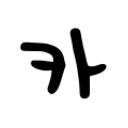

In [216]:
a

In [217]:
b = (255-np.array(a)) 

In [219]:
b[np.where(a1!=0)] = 0

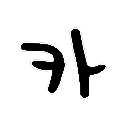

In [220]:
Image.fromarray(255-b)

In [204]:
aa = np.where(a1!=0)

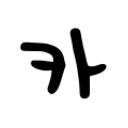

In [231]:
a

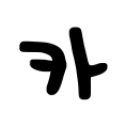

In [227]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

erosion = cv2.erode(np.array(a),kernel,iterations = 1)
Image.fromarray(erosion)

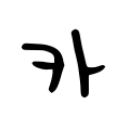

In [228]:
dilation = cv2.dilate(np.array(a),kernel,iterations = 1)
Image.fromarray(dilation)

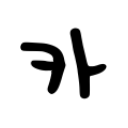

In [229]:
opening = cv2.morphologyEx(np.array(a), cv2.MORPH_OPEN, kernel)
Image.fromarray(opening)

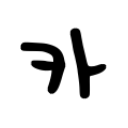

In [230]:
closing = cv2.morphologyEx(np.array(a), cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [205]:
gradient = cv2.morphologyEx(orig, cv2.MORPH_GRADIENT, kernel)

In [205]:
tophat = cv2.morphologyEx(orig, cv2.MORPH_TOPHAT, kernel)

In [205]:
blackhat = cv2.morphologyEx(orig, cv2.MORPH_BLACKHAT, kernel)

(array([28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31,
        32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40,
        40, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
        42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
        43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46,
        46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49,
        49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52,
        52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54,
        55, 55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 57, 58, 58, 58, 58,
        59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
        60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
        61, 62, 62, 62, 62, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 

In [126]:
b = 255 - np.array(a1).astype(np.float32)

(128, 128)

In [129]:
c = avgpool(torch.from_numpy(b).unsqueeze(0))

In [130]:
c.shape

torch.Size([1, 128, 128])

In [131]:
b.shape

(128, 128)

In [132]:
d = 255-c.numpy()

In [133]:
d.shape

(1, 128, 128)

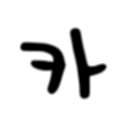

In [135]:
Image.fromarray(d.astype(np.uint8).squeeze(0))

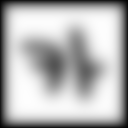

In [142]:
x = torch.from_numpy(d)
for _ in range(100):
    x = avgpool(x)
Image.fromarray(x.numpy().astype(np.uint8).squeeze(0))

In [199]:
def filtering(x):
    x = avgpool(x)
    x[x<20] = 0
    x *= 255/x.max()
    return x

In [200]:
b.max()

255.0

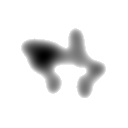

In [202]:
x = torch.from_numpy(a1.astype(np.float32)).unsqueeze(0)
for _ in range(100):
    x = filtering(x)
x = 255-x.numpy()
Image.fromarray(x.astype(np.uint8).squeeze(0))

In [178]:
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [179]:
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [181]:
c = 

In [182]:
c

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])